In [2]:
import sys
sys.path.append("../classes")

import SVHN_data
import cnn_recogniser as CNN
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### We load the data

In [3]:
data = SVHN_data.SVHN_Single_Digit()
X, y, X_valid, y_valid, X_test, y_test  = data.datasets(format="digits")

##### We reformat the target vector for processing

In [4]:
yc = np.ones((len(y),2),dtype=np.int64)
yc_valid = np.ones((len(y_valid),2),dtype=np.int64)
yc_test = np.ones((len(y_test),2),dtype=np.int64)
yc[:,1] = y
yc_valid[:,1] = y_valid
yc_test[:,1] = y_test

## Higher depth structure case

In [ ]:
structure1 = [("conv", {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 1}),
                 ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                 ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32}),
                 ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                  ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 64})]

model1 = CNN.Recogniser_Type2(structure=structure1, nb_classes=10, img_rows=32,
                              img_cols=32, max_nb_digits=1, nb_hidden=512)

In [ ]:
n_e = 50000
logging_info = 100
seed=100

optim = {"type" :"Adagrad", "learning_rate": 0.01}
model1.fit(X, yc, X_valid, yc_valid, X_test, yc_test, batch_size=128, nb_epochs=n_e,
      logging_info=logging_info, seed=seed, p_dropout=0.5, optimizer=optim)


Minibatch loss value at step 1: 4.76
Minibatch digit accuracy: 11.7%, full sequence accuracy: 11.7%
Validation set digit accuracy: 10.0%, full sequence accuracy: 10.0%


In [ ]:
epochs = np.arange(1, 50000, logging_info)
fig, ax = plt.subplots()
#plt.title("Training and validation errors")
plt.xlabel("Epoches")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
ax.plot(epochs, np.array(model1.logger["training_error"])[:,0], 'r', label='Training Accuracy')
ax.plot(epochs, np.array(model1.logger["validation_error"])[:,0], 'k', label='Validation Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/SVHN_SD1.jpg")
plt.show()

## Low depth structure case

In [10]:
structure2 = [("conv", {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 1}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                  ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"})]


model2 = CNN.Recogniser_Type2(structure=structure2, nb_classes=10, img_rows=32,
                              img_cols=32, max_nb_digits=1, nb_hidden=512)

In [11]:
n_e = 50000
logging_info = 200
seed=100

optim = {"type" :"Adagrad", "learning_rate": 0.01}
model2.fit(X, yc, X_valid, yc_valid, X_test, yc_test, batch_size=128, nb_epochs=n_e,
      logging_info=logging_info, seed=seed, p_dropout=0.5, optimizer=optim)

Minibatch loss value at step 1: 6.67
Minibatch digit accuracy: 12.5%, full sequence accuracy: 12.5%
Validation set digit accuracy: 10.0%, full sequence accuracy: 10.0%
Minibatch loss value at step 201: 1.23
Minibatch digit accuracy: 74.2%, full sequence accuracy: 74.2%
Validation set digit accuracy: 65.0%, full sequence accuracy: 65.0%
Minibatch loss value at step 401: 0.53
Minibatch digit accuracy: 93.8%, full sequence accuracy: 93.8%
Validation set digit accuracy: 81.6%, full sequence accuracy: 81.6%
Minibatch loss value at step 601: 0.46
Minibatch digit accuracy: 90.6%, full sequence accuracy: 90.6%
Validation set digit accuracy: 84.8%, full sequence accuracy: 84.8%
Minibatch loss value at step 801: 0.45
Minibatch digit accuracy: 90.6%, full sequence accuracy: 90.6%
Validation set digit accuracy: 84.8%, full sequence accuracy: 84.8%
Minibatch loss value at step 1001: 0.24
Minibatch digit accuracy: 98.4%, full sequence accuracy: 98.4%
Validation set digit accuracy: 86.0%, full sequen

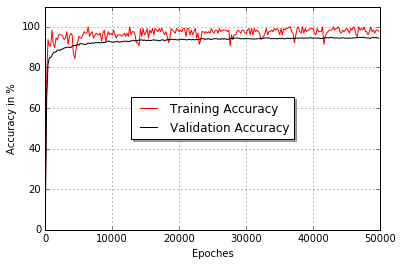

In [12]:
epochs = np.arange(1, n_e, logging_info)
fig, ax = plt.subplots()
plt.xlabel("Epoches")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
ax.plot(epochs, np.array(model2.logger["training_error"])[:,0], 'r', label='Training Accuracy')
ax.plot(epochs, np.array(model2.logger["validation_error"])[:,0], 'k', label='Validation Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/SVHN_SD2.jpg")
plt.show()